In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score 
import joblib
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
data = pd.read_csv("/kaggle/input/fakenewscorpus/preprocessed_data.csv")

# Splitting into X (features) and y (target)
X = data['content']
y = data['label']

In [3]:
# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [4]:
# Vectorize the input data (X) using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)
joblib.dump(vectorizer, "nb_count_vec.pkl")

['nb_count_vec.pkl']

In [5]:
# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)
# Save the classifier
joblib.dump(classifier, "nb_count_classifier.pkl")

['nb_count_classifier.pkl']

Validation Accuracy: 0.8400766100071821


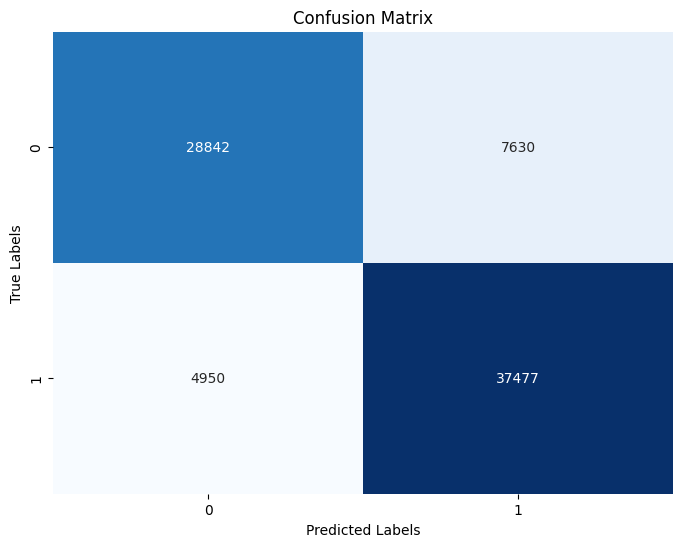

Test Accuracy: 0.840555647093119

Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.79      0.82     36472
         1.0       0.83      0.88      0.86     42427

    accuracy                           0.84     78899
   macro avg       0.84      0.84      0.84     78899
weighted avg       0.84      0.84      0.84     78899



In [7]:
# Validation with validation data
val_score = classifier.score(X_val_vec, y_val)
print("Validation Accuracy:", val_score)

# Predictions with test data
y_pred = classifier.predict(X_test_vec)

# Evaluate the classifier
test_accuracy = accuracy_score(y_test, y_pred)
report_test = classification_report(y_test, y_pred)

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print and save the reports
print("Test Accuracy:", test_accuracy)
print("\nTest Classification Report:")
print(report_test)

# Save the reports to a file
with open("nb_count_report.txt", "w") as file:
    file.write("Test Accuracy: {}\n\n".format(test_accuracy))
    file.write("Test Classification Report:\n")
    file.write(report_test)

Cross-domain validation

In [8]:
# Load the LIAR Cross-Domain Test data
test_df = pd.read_csv("/kaggle/input/cross-domain-data-liar/labeled-strictness-high-test.tsv", sep='\t', header=None)

# Extract news (X) and labels (y) from the test data
X = test_df[2]  # News Content in column 2
y = test_df[14]  # Label in column 15

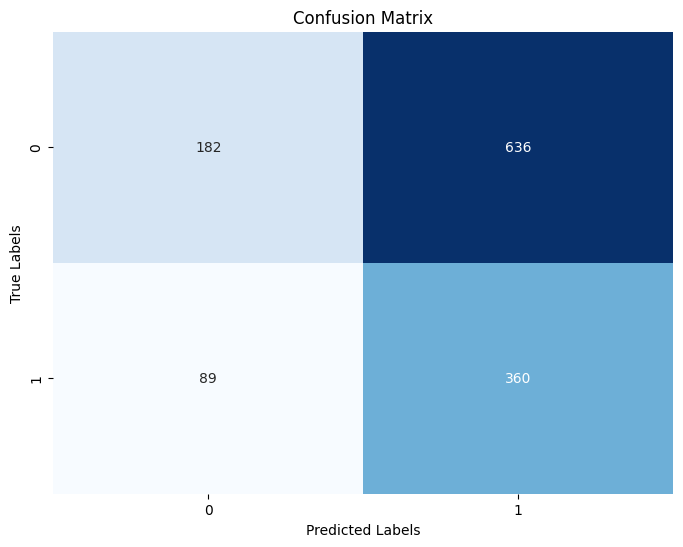

Accuracy: 0.4277821625887924
Precision: 0.5616788399414695
Recall: 0.4277821625887924
F1-score: 0.39237647821604343


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the saved vectorizer
vectorizer = joblib.load("nb_count_vec.pkl")
# Vectorize the news data
X_vec = vectorizer.transform(X)

# Load the saved classifier
classifier = joblib.load("nb_count_classifier.pkl")

# Make predictions
y_pred = classifier.predict(X_vec)

# Calculate test accuracy
accuracy = accuracy_score(y, y_pred)

# Visualize confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate precision, recall, and f1-score
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Classification including Title and Domain along with Content

Validation Accuracy: 0.8994912026377875
Test Accuracy: 0.8984906625735483

Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89     35845
         1.0       0.90      0.92      0.91     42335

    accuracy                           0.90     78180
   macro avg       0.90      0.90      0.90     78180
weighted avg       0.90      0.90      0.90     78180



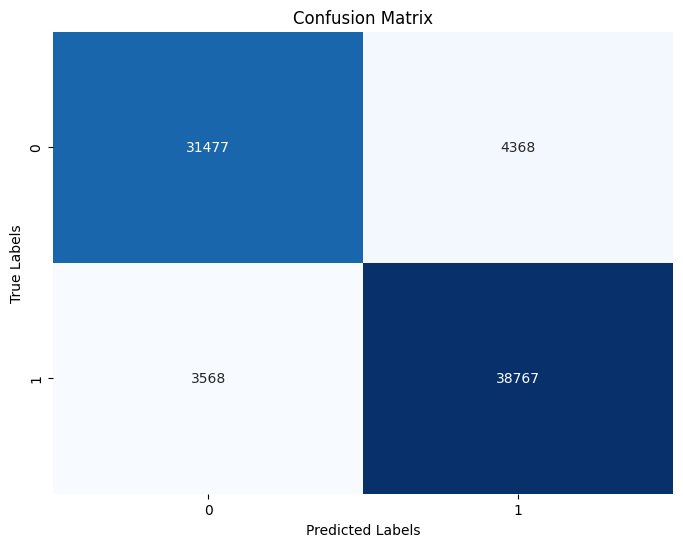

In [10]:
# Drop rows with NaN values in 'title' and 'domain' columns
data = data.dropna(subset=['title', 'domain'])

# Convert 'title' and 'domain' columns to string
data['title'] = data['title'].astype(str)
data['domain'] = data['domain'].astype(str)

# Concatenate 'content', 'title', and 'domain' columns
X = data[['content', 'title', 'domain']].apply(lambda x: ' '.join(x), axis=1)
y = data['label']

# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Vectorization
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)
joblib.dump(vectorizer, "nb_vec-t-d.pkl")

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)

# Save the classifier
joblib.dump(classifier, "nb_count_classifier-t-d.pkl")

# Validation with validation data
val_score = classifier.score(X_val_vec, y_val)
print("Validation Accuracy:", val_score)

# Predictions with test data
y_pred = classifier.predict(X_test_vec)

# Evaluate the classifier
test_accuracy = accuracy_score(y_test, y_pred)
report_test = classification_report(y_test, y_pred)


# Print and save the reports
print("Test Accuracy:", test_accuracy)
print("\nTest Classification Report:")
print(report_test)

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Save the reports to a file
with open("nb_count_report-t-d.txt", "w") as file:
    file.write("Test Accuracy: {}\n\n".format(test_accuracy))
    file.write("Test Classification Report:\n")
    file.write(report_test)

Cross-domain validation

Accuracy: 0.43172849250197315
Precision: 0.5460117039094419
Recall: 0.43172849250197315
F1-score: 0.4101020407312389


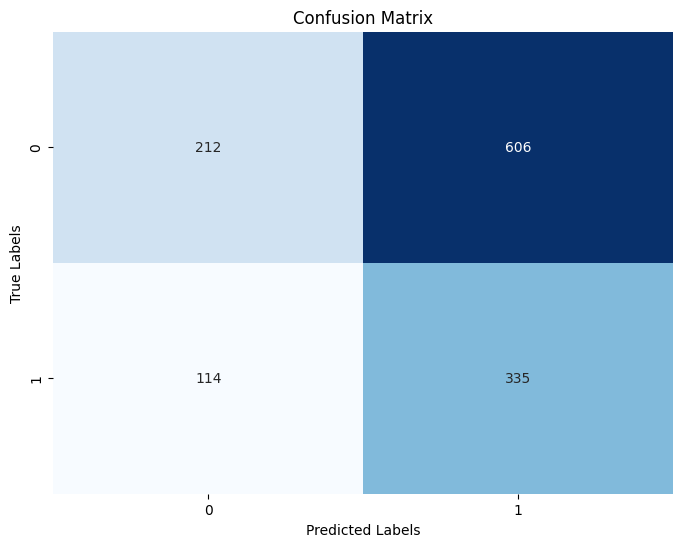

In [11]:
# Load the LIAR Cross-Domain Test data
test_df = pd.read_csv("/kaggle/input/cross-domain-data-liar/labeled-strictness-high-test.tsv", sep='\t', header=None)

# Extract news (X) and labels (y) from the test data
X = test_df[2]  # News Content in column 2
y = test_df[14]  # Label in column 15

# Load the saved vectorizer
vectorizer = joblib.load("nb_vec-t-d.pkl")
# Vectorize the news data
X_vec = vectorizer.transform(X)

# Load the saved classifier
classifier = joblib.load("nb_count_classifier-t-d.pkl")

# Make predictions
y_pred = classifier.predict(X_vec)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

# Calculate precision, recall, and f1-score
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Visualize confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()